loading annotations into memory...


Done (t=0.58s)
creating index...
index created!


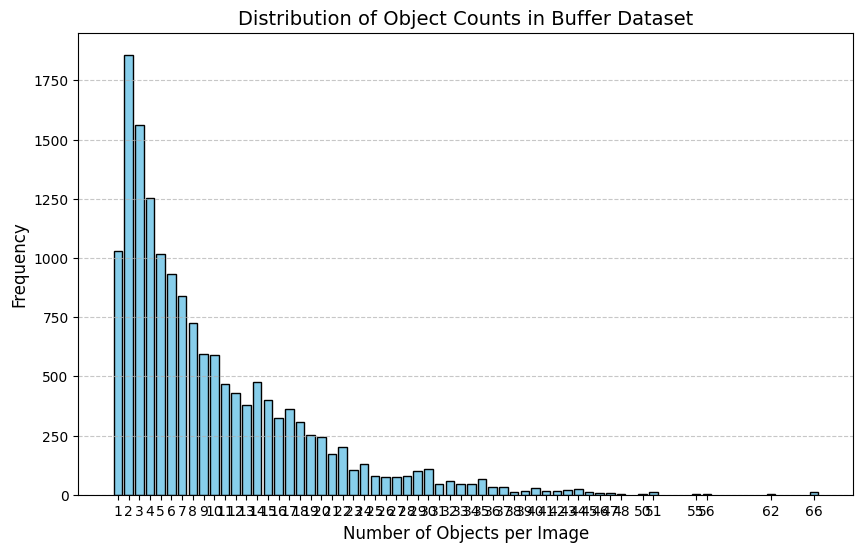

In [28]:
from torchvision.datasets import CocoDetection
from torch.utils.data import DataLoader
import torchvision
torchvision.disable_beta_transforms_warning()
import os
from collections import Counter


import matplotlib.pyplot as plt

if __name__ == "__main__":
    buffer_path = "/workspace/CL-RTDETR-DIFFUSION/buffer"
    buffer_ann_file = "/workspace/CL-RTDETR-DIFFUSION/buffer/buffer.json"
    buffer_dataset = CocoDetection(buffer_path, buffer_ann_file)
    buffer_dataloader = DataLoader(buffer_dataset, batch_size=64, shuffle=False, collate_fn=lambda x: tuple(zip(*x)))

    list_num_obj = []
    for idx, (images, targets) in enumerate(buffer_dataloader):
        for target in targets:
            list_num_obj.append(len(target))

    list_all = Counter(list_num_obj)

    # Visualization
    counts = list(list_all.keys())
    frequencies = list(list_all.values())

    plt.figure(figsize=(10, 6))
    plt.bar(counts, frequencies, width=0.8, color='skyblue', edgecolor='black')
    plt.xlabel('Number of Objects per Image', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.title('Distribution of Object Counts in Buffer Dataset', fontsize=14)
    plt.xticks(counts)  # Set the x-axis to show every count
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.show()

        

In [29]:
counts[:10], sum(fr for fr in frequencies)

([32, 3, 4, 23, 2, 6, 30, 18, 10, 9], 15680)

In [17]:
len(list_num_obj)

15680

In [18]:
cnt = 0
for i in range(1,10):
    cnt += list_all[i]
    print(list_all[i])
print('Count: ', cnt)

1029
1858
1562
1251
1016
930
838
725
593
Count:  9802


loading annotations into memory...
Done (t=0.06s)
creating index...
index created!


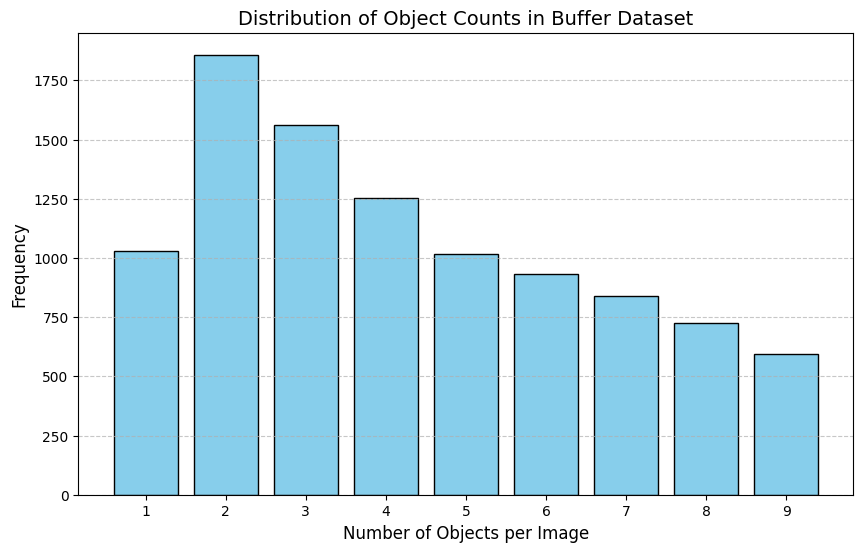

In [22]:
buffer_path = "/workspace/CL-RTDETR-DIFFUSION/buffer"
buffer_ann_file = "/workspace/CL-RTDETR-DIFFUSION/buffer/buffer_diffusion.json"
buffer_dataset = CocoDetection(buffer_path, buffer_ann_file)
buffer_dataloader = DataLoader(buffer_dataset, batch_size=64, shuffle=False, collate_fn=lambda x: tuple(zip(*x)))

list_num_obj = []
for idx, (images, targets) in enumerate(buffer_dataloader):
    for target in targets:
        list_num_obj.append(len(target))

list_all = Counter(list_num_obj)

# Visualization
counts = list(list_all.keys())
frequencies = list(list_all.values())

plt.figure(figsize=(10, 6))
plt.bar(counts, frequencies, width=0.8, color='skyblue', edgecolor='black')
plt.xlabel('Number of Objects per Image', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Object Counts in Buffer Dataset', fontsize=14)
plt.xticks(counts)  # Set the x-axis to show every count
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [30]:
sum(list_all[i] for i in range(0,5))

5700

In [33]:
from pycocotools.coco import COCO

# Path to COCO dataset annotations file
annotations_file = '/workspace/coco/annotations/captions_val2017.json'

# Initialize COCO API
coco = COCO(annotations_file)

# Specify the image_id you are interested in
image_id = 397133  # Replace with the desired image_id

# Get all annotations for the given image_id
annotation_ids = coco.getAnnIds(imgIds=image_id)
annotations = coco.loadAnns(annotation_ids)

# Print all captions for the given image
print(f"Captions for image_id {image_id}:")
for ann in annotations:
    print(ann['caption'])


loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
Captions for image_id 397133:
A man is in a kitchen making pizzas.
Man in apron standing on front of oven with pans and bakeware
A baker is working in the kitchen rolling dough.
A person standing by a stove in a kitchen.
A table with pies being made and a person standing near a wall with pots and pans hanging on the wall.


In [34]:
import os
len(os.listdir("/workspace/coco/train2017"))

118287

In [ ]:
from pycocotools.coco import COCO
anno_path = "/workspace/CL-RTDETR-DIFFUSION/buffer/buffer_diffusion.json"
caption_path = "/workspace/coco/annotations/captions_train2017.json"
coco_anno = COCO(anno_path)
coco_caption = COCO(caption_path)
